In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych z pliku CSV
file_path = "Data/FINAL_CSV/test30_reduced.csv"
data = pd.read_csv(file_path)
data = data[:600]

                        tcp.time_delta   tcp.len  mqtt.conack.val  \
tcp.time_delta                1.000000 -0.029944        -0.008437   
tcp.len                      -0.029944  1.000000        -0.030220   
mqtt.conack.val              -0.008437 -0.030220         1.000000   
mqtt.conflag.cleansess       -0.008502  0.004114        -0.008403   
mqtt.conflag.passwd          -0.003792 -0.010725        -0.003746   
mqtt.conflag.uname           -0.003792 -0.010725        -0.003746   
mqtt.dupflag                 -0.025139  0.344147        -0.024826   
mqtt.kalive                  -0.005379 -0.019214        -0.005316   
mqtt.len                     -0.039033  0.649610        -0.042105   
mqtt.msgid                   -0.057621  0.506468        -0.057858   
mqtt.msgtype                  0.350105  0.198103         0.000347   
mqtt.proto_len               -0.008502  0.004114        -0.008403   
mqtt.qos                     -0.040376  0.688633        -0.040996   
mqtt.ver                     -0.00

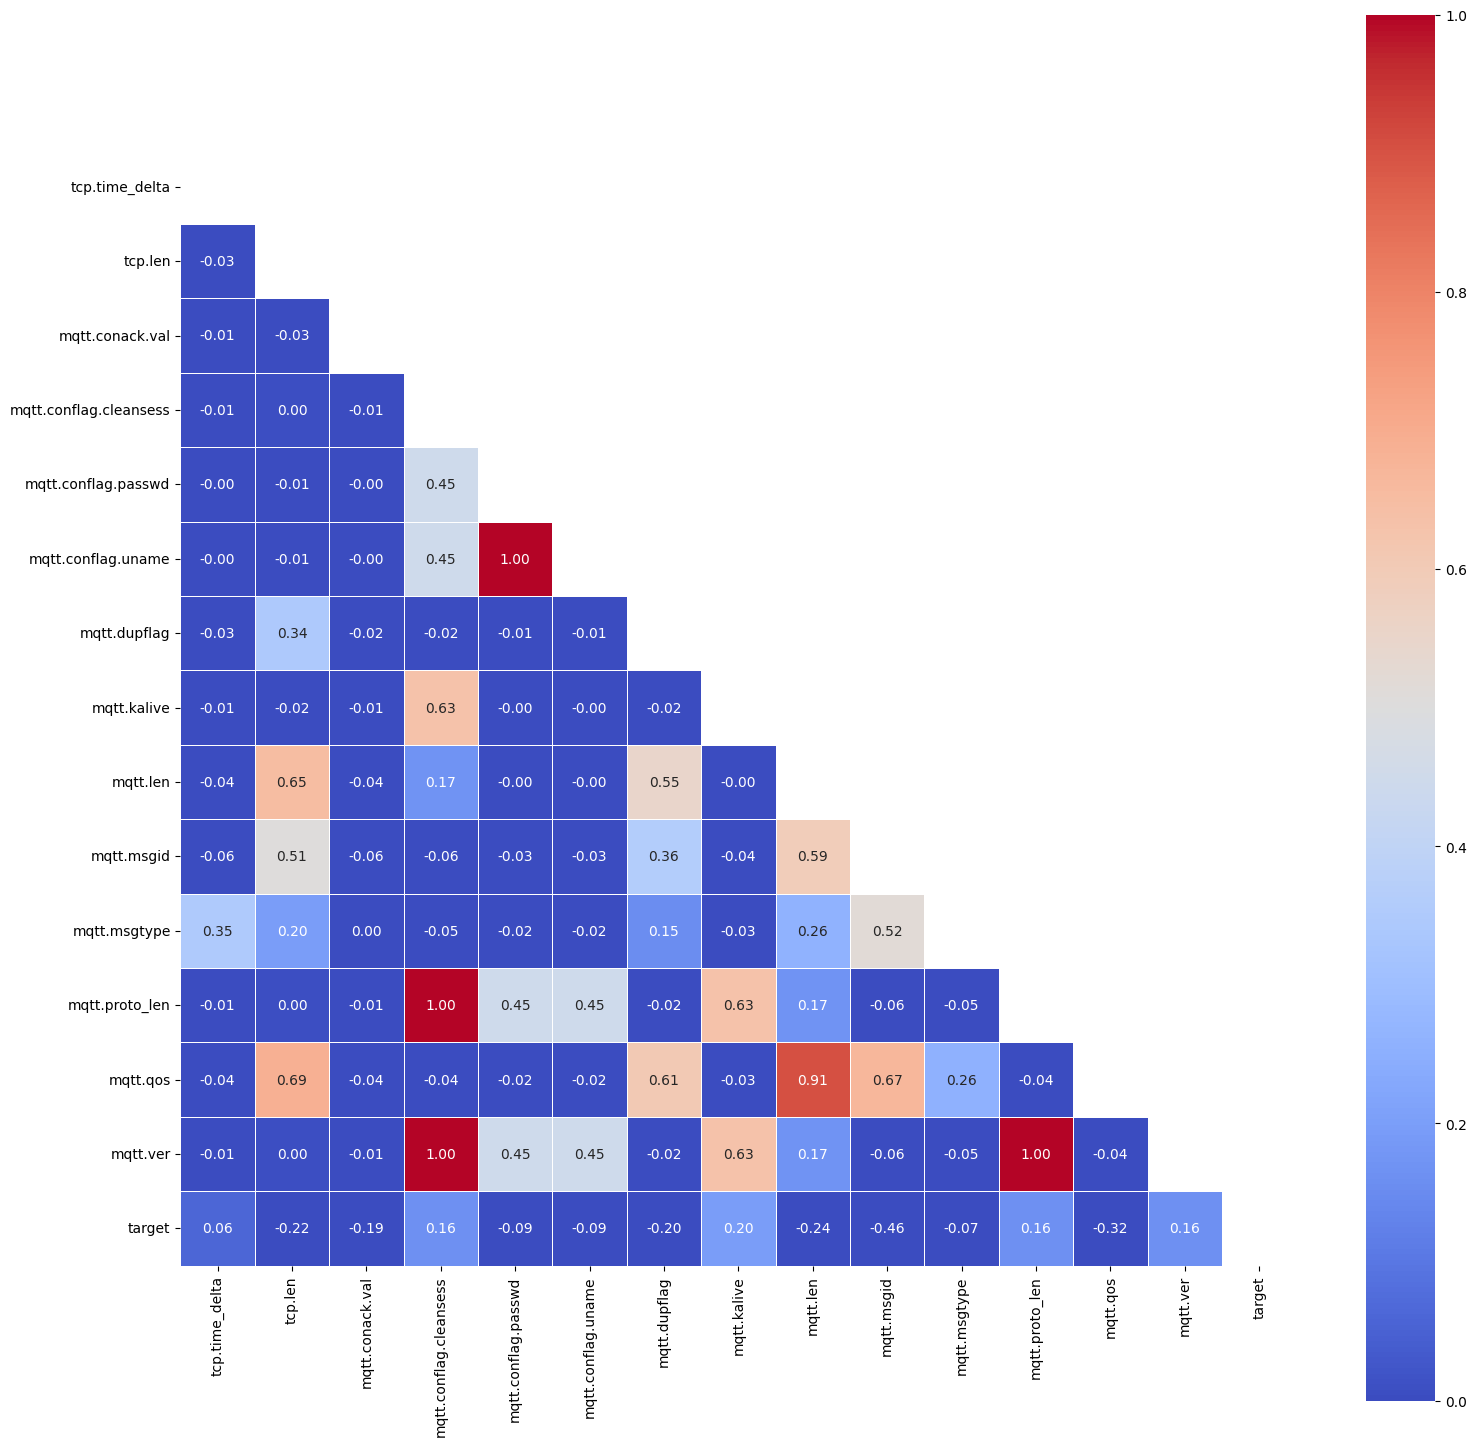

In [47]:

import numpy as np
from sklearn.preprocessing import LabelEncoder
data['target'] = data['target'].replace('legitimate', 'other')
data['target'] = data['target'].replace('malformed', 'other')
data['target'] = data['target'].replace('bruteforce', 'other')
data['target'] = data['target'].replace('slowite', 'other')
data['target'] = data['target'].replace('flood', 'other')

encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])
encoder.classes_

numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Obliczenie macierzy korelacji
corr_matrix = numerical_data.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')

print(corr_matrix)

my_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


# Wygenerowanie wykresu macierzy korelacji
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1, square=True, mask=my_mask)
# plt.title('Macierz korelacji')
plt.show()